# Data Analytics Lab: Identifying Vulnerable Communities using the U.S. Census API

## Background
You work for a non-profit organization aiming to allocate resources to vulnerable communities across the U.S. Your team needs to analyze census data to identify areas with high poverty rates, low income levels, or other indicators of vulnerability. Using data from the U.S. Census Bureau, you'll create a report highlighting which regions require the most attention.



## Table of Contents
- [Step 1: Importing Libraries](#step-1)
- [Step 2: Retrieving the Data](#step-2)
    - [Request Data Using an API](#request-data-using-an-api)
        - [Exercise 1a: Authenticate with the API](#ex1a)
        - [Exercise 1b: Load the Response](#ex1b)
    - [Converting the Data to a DataFrame](#converting-the-data-to-a-dataframe)
        - [Exercise 2: Parse JSON Data into a DataFrame](#ex2)
- [Step 3: Data Transformation and Quality Assessment](#step-3)
    - [Exercise 3: Remove Missing Value and Correct Data Types](#ex3)
    - [Exercise 4: Extract State Name](#ex4)
    - [Exercise 5: Data Normalization](#ex5)
- [Step 4: Identifying Most Vulnerable Areas](#step-4)
    - [Defining a Vulnerability Metric](#defining-a-vulnerability-metric)
        - [Exercise 6: Multi-Factor Vulnerability Analysis](#ex6)
        - [Exercise 7: Categorize Vulnerability Scores](#ex7)
    - [Using Outliers to Identify Population at Risk](#using-outliers)
        - [Exercise 8: Identifying outliers](#ex8)


## Step 1: Importing Libraries

Start by importing all the libraries you will need for the lab

In [2]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from dotenv import load_dotenv

<a id="step-2"></a>

## Step 2: Retrieving the Data



In [3]:
# GRADED CELL: Exercise 1a

BASE_URL = "https://2eraiuh.dlai.link/api/UScensus"

### START CODE HERE ###

# load the environment variables
load_dotenv()

# load API key from environment variable
API_KEY = os.getenv("CENSUS_API_KEY")

# define the parameters for the API request
params = { 
    "api_key": API_KEY
}

# request the data
response = requests.get(BASE_URL, params)

### END CODE HERE ###

In [4]:
# print the status code
print(response.status_code)

200


In [5]:
# GRADED CELL: Exercise 1b

### START CODE HERE ###

# load the data in JSON format
census_data = response.json()

### END CODE HERE ###

In [6]:
# print the output
print(f"{census_data}"[:200])

{'data': [{'county': '003', 'county_state': 'Baldwin County, Alabama', 'employed_male': '99756', 'employed_total': '206994', 'female_pop_over_75': 12593, 'female_pop_under_5': '5037', 'male_pop_over_7


<a id="converting-the-data-to-a-dataframe"></a>

### Converting the Data to a DataFrame



In [7]:
# GRADED CELL: Exercise 2

### START CODE HERE ###

# Create DataFrame
census_df = pd.DataFrame(census_data["data"])

### END CODE HERE ###

In [8]:
# print the data types
print("Data types:")
print(census_df.dtypes)

# print first rows
census_df.head()

Data types:
county                          object
county_state                    object
employed_male                   object
employed_total                  object
female_pop_over_75               int64
female_pop_under_5              object
male_pop_over_75                 int64
male_pop_under_5                object
population                      object
poverty_count                   object
poverty_count_female_over_75    object
poverty_count_female_under_5    object
poverty_count_male_over_75      object
poverty_count_male_under_5      object
state                           object
total_pop_male                  object
dtype: object


,county,county_state,employed_male,employed_total,female_pop_over_75,female_pop_under_5,male_pop_over_75,male_pop_under_5,population,poverty_count,poverty_count_female_over_75,poverty_count_female_under_5,poverty_count_male_over_75,poverty_count_male_under_5,state,total_pop_male
0,003,"Baldwin County, Alabama",99756,206994,12593,5037,10549,6617,253507,24403,833,310,177,1733,01,124518
1,015,"Calhoun County, Alabama",45042,95233,5338,3055,3106,3102,116429,23725,581,1333,149,1067,01,56185
2,043,"Cullman County, Alabama",36400,73980,4556,3232,3205,2368,92016,16699,701,870,177,936,01,45015
3,049,"DeKalb County, Alabama",27853,56881,3032,1610,2131,2631,72569,17629,480,477,117,1129,01,36341
4,051,"Elmore County, Alabama",35195,72745,3647,1658,2742,2760,90441,11160,621,40,98,812,01,44607


<a id="step-3"></a>

## Step 3: Data Transformation and Quality Assessment



In [17]:
# GRADED CELL: Exercise 3

### START CODE HERE ###

# check missing values
missing_data = census_df.isnull().sum()


# remove missing rows. 
# keep the .copy() method at the end to avoid warnings
census_df_clean = census_df.dropna().copy()

# convert columns to numeric. 
# get all the numerical column indexis (all except "county_state" in index 1)
num_cols = [0]+list(range(2,census_df.shape[1])) 
# iterate over each of the columns and convert to numeric
for col in num_cols:    
    column_name = census_df_clean.columns[col]
    census_df_clean[column_name] = pd.to_numeric(census_df_clean[column_name], errors='coerce')

### END CODE HERE ###

In [19]:
# print number of missing values per row
print("Missing values:")
print(missing_data)

# print data types
print("\nData types:")
print(census_df_clean.dtypes)

Missing values:
county                           0
county_state                     0
employed_male                   21
employed_total                  21
female_pop_over_75               0
female_pop_under_5               0
male_pop_over_75                 0
male_pop_under_5                 0
population                       0
poverty_count                    7
poverty_count_female_over_75     7
poverty_count_female_under_5     7
poverty_count_male_over_75       7
poverty_count_male_under_5       7
state                            0
total_pop_male                   0
dtype: int64

Data types:
county                           int64
county_state                    object
employed_male                    int64
employed_total                   int64
female_pop_over_75               int64
female_pop_under_5               int64
male_pop_over_75                 int64
male_pop_under_5                 int64
population                       int64
poverty_count                    int64
poverty_

<a id="ex4"></a>

#### Exercise 4: Extract State Name
To facilitate analysis across different states, you want to extract the State name from the "county_state" column.



In [22]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# extract the state name
state_name = census_df_clean["county_state"].str.split(pat=",", expand=True)[1]

# add the state name as a new column
census_df_clean["state_name"] = state_name

### END CODE HERE ###

In [23]:
# print the first few rows to check the results
census_df_clean[["county_state", "state_name"]].head()

,county_state,state_name
0,"Baldwin County, Alabama",Alabama
1,"Calhoun County, Alabama",Alabama
2,"Cullman County, Alabama",Alabama
3,"DeKalb County, Alabama",Alabama
4,"Elmore County, Alabama",Alabama


<a id="ex5"></a>

#### Exercise 5: Data Normalization

Very young kids and elderly people are some of the most at-risk groups. In particular, small children could see an impairment in their development, which could have an impact way into adulthood. For this reason, you want to calculate and compare poverty rates across age groups to identify the most vulnerable populations.


In [24]:
# GRADED CELL: Exercise 5
 
### START CODE HERE ###

# calculate total poverty rate
census_df_clean['total_poverty_rate'] = census_df_clean["poverty_count"]/census_df_clean["population"]

# calculate poverty rate for young kids
census_df_clean['under_5_poverty_rate'] = (census_df_clean["poverty_count_male_under_5"]+census_df_clean["poverty_count_female_under_5"])/(census_df_clean["male_pop_under_5"]+census_df_clean["female_pop_under_5"])

# calculate poverty rate for elderly
census_df_clean['over_75_poverty_rate'] = (census_df_clean["poverty_count_male_over_75"]+census_df_clean["poverty_count_female_over_75"])/(census_df_clean["male_pop_over_75"]+census_df_clean["female_pop_over_75"])

### END CODE HERE ###

In [25]:
# print the first few rows to check the results
census_df_clean[["total_poverty_rate", "under_5_poverty_rate", 
                 "over_75_poverty_rate"]].head()

,total_poverty_rate,under_5_poverty_rate,over_75_poverty_rate
0,0.096262,0.175305,0.043644
1,0.203772,0.389800,0.086452
2,0.181479,0.322500,0.113130
3,0.242927,0.378684,0.115630
4,0.123395,0.192847,0.112537


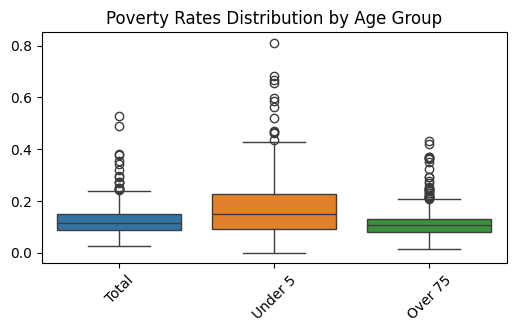

In [26]:
# visualize the distribution of the rates
plt.figure(figsize=(6, 3))
sns.boxplot(data=census_df_clean[['total_poverty_rate', 'under_5_poverty_rate', 
                     'over_75_poverty_rate']])
plt.title('Poverty Rates Distribution by Age Group')
plt.xticks(ticks=[0, 1, 2], labels=['Total', 'Under 5', 'Over 75'], 
           rotation=45)
plt.show()

Poverty rates among children under 5 appear higher than both the total population and over-75 rates. You want to analyze how this variable differs across states.

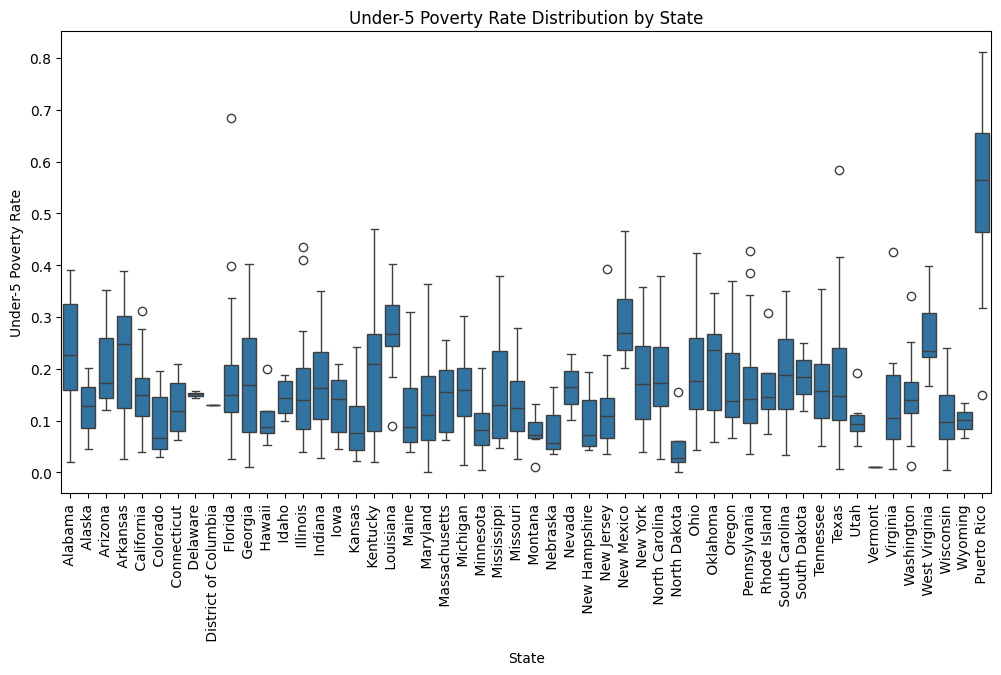

In [27]:
# visualize the distribution of the rates by state
plt.figure(figsize=(12, 6))
sns.boxplot(x='state_name', y='under_5_poverty_rate', data=census_df_clean)
plt.title('Under-5 Poverty Rate Distribution by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Under-5 Poverty Rate')
plt.show()

What conclusions can you make based on these graphs?

<a id="step-4"></a>

## Step 4: Identifying Most Vulnerable Areas

<a id="defining-a-vulnerability-metric"></a>

### Defining a Vulnerability Metric

To effectively allocate your organization's resources, you need a systematic way to identify the most vulnerable communities.

<a id="ex6"></a>

#### Exercise 6: Multi-Factor Vulnerability Analysis

To understand the communities you're studying, you need to consider how different vulnerabilities interact. By analyzing multiple factors together, you can develop a more comprehensive understanding of each community's specific needs.


In [31]:
# GRADED CELL: Exercise 6

# get the employment rate
census_df_clean['employment_rate'] = census_df_clean["employed_total"] / census_df_clean["population"]
# get the proportion of children under 5 in poverty
census_df_clean['under_5_poverty_proportion'] = (
                            census_df_clean["poverty_count_female_under_5"] +
                            census_df_clean["poverty_count_male_under_5"]
                            )/ census_df_clean["poverty_count"]

### START CODE HERE ###

# calculate vulnerability score 
vulnerability_score = ( 
    # overall poverty (35% weight)
    census_df_clean["total_poverty_rate"] * 0.35 +
    # child poverty (40% weight)
    census_df_clean['under_5_poverty_proportion'] * 0.40 +
    # unemployment (25% weight). Subtract employment rate from 1 to get the 
    # unemployment rate
    ((1-census_df_clean['employment_rate']) *0.25)
) 

# scale the vulnerability score between 0-1
# find the min vulnerability score
min_vs = vulnerability_score.min()
# find the max vulnerability score
max_vs = vulnerability_score.max()


# normalize it to 0-100 for easier interpretation and add it to a column
census_df_clean['vulnerability_score'] = (vulnerability_score - min_vs)/(max_vs - min_vs)*100

### END CODE HERE ###

Text(0.5, 0, 'Vulnerability Score')

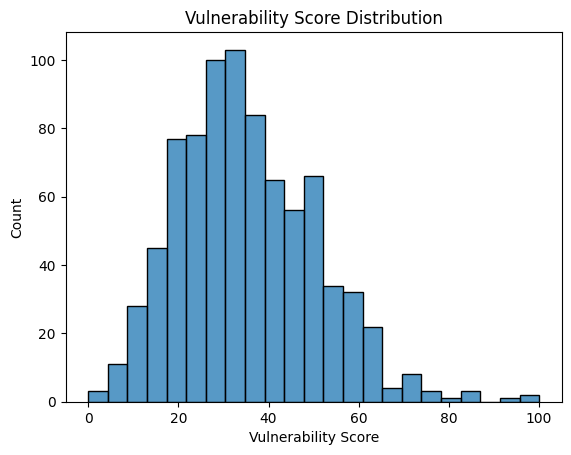

In [32]:
# plot the distribution of the vulnerability score
sns.histplot(census_df_clean['vulnerability_score'])
plt.title('Vulnerability Score Distribution')
plt.xlabel('Vulnerability Score')

With this score, you can find the top 5 counties that need the most attention.

In [33]:
# find the 5 counties with the highest vulnerability score
census_df_clean.sort_values(by='vulnerability_score', ascending=False
                     )[["county_state","vulnerability_score"]].head()

,county_state,vulnerability_score
848,"Mayagüez Municipio, Puerto Rico",100.000000
849,"Ponce Municipio, Puerto Rico",99.992277
449,"McKinley County, New Mexico",94.777404
720,"Hidalgo County, Texas",85.256972
271,"Christian County, Kentucky",83.628375


<a id="ex7"></a>
#### Exercise 7: Categorize Vulnerability Scores

To effectively allocate resources, we need to identify the communities most in need of immediate intervention. You can do this by creating categories according to the vulnerability score you just created.



In [34]:
# GRADED CELL: Exercise 7

### START CODE HERE ###

# find the category for each county based on the vulnerability score
priority_score = pd.qcut(census_df_clean['vulnerability_score'], q=5, labels=[ 'Very Low', 'Low', 'Medium', 'High', 'Very High'])

# add the priority score to the DataFrame
census_df_clean['priority_score'] = priority_score

### END CODE HERE ###

In [35]:
# print the first few rows to check the results
census_df_clean[['county_state', 'vulnerability_score', 'priority_score']].head()

,county_state,vulnerability_score,priority_score
0,"Baldwin County, Alabama",31.968542,Medium
1,"Calhoun County, Alabama",58.262534,Very High
2,"Cullman County, Alabama",57.361382,Very High
3,"DeKalb County, Alabama",69.085500,Very High
4,"Elmore County, Alabama",37.669165,High


You can use this information to find the states which have counties with a "Very High" priority score, and show how many counties with this score they have. This is a great strategy to help allocate resources.

In [36]:
# find the states with very high vulnerability

# filter the counties with very high vulnerability
very_high_vulnerability = census_df_clean[census_df_clean['priority_score']=="Very High"][
    ["vulnerability_score", "state_name"]]

# group by state and get the number of counties with very high vulnerability
very_high_vulnerability.groupby(
    "state_name").count().sort_values(by="vulnerability_score", ascending=False)

,vulnerability_score
state_name,
Texas,17
Louisiana,14
Georgia,12
California,11
North Carolina,10
Alabama,10
Puerto Rico,8
Ohio,7
Arkansas,6


<a id="using-outliers"></a>

### Using Outliers to Identify Population at Risk

<a id="ex8"></a>

#### Exercise 8: Handling Outliers in Poverty Rates

Another way to identify communities in urgent need is by looking for counties with unusually high poverty rates that stand out from typical patterns. These statistical outliers often represent areas facing severe challenges that require immediate intervention.



In [37]:
# GRADED CELL: Exercise 8


# Calculate the Z-scores for the 'poverty_count' column
census_df_clean['z_score'] = stats.zscore(census_df_clean['poverty_count'])

# Define a threshold for Z-scores to identify outliers (commonly 3 or -3)
z_score_threshold = 3

# Identify outliers using Z-scores
z_score_outliers = census_df_clean[abs(census_df_clean['z_score']) > z_score_threshold]


### END CODE HERE ###

In [ ]:
# print the outliers
z_score_outliers[["county_state", "poverty_count", 
                  "total_poverty_rate", "under_5_poverty_rate", 
                  "priority_score", "z_score"]]